# Estimation puissance à fournir

Dans ce code, on essaie de déterminer la puissance nécessaire pour chauffer les bâtiments du port (en hiver) ou alors les refroidir (en été). On cherchera ensuite l'énergie thermique consommée par les bâtiments.

### Importation des librairies

In [63]:
import numpy as np
import matplotlib.pyplot as plt

## Récupération des données

### Récupération des surfaces et des hauteurs

In [53]:
nombre_batiment = int(input('quels est le nombre de bâtiments considérés ?'))

surface_batiment = [0 for i in range(nombre_batiment)]
hauteur_batiment = [0 for i in range(nombre_batiment)]
type_batiment = [0 for i in range(nombre_batiment)] #dans un second temps, calcul du coefficient de perte

for i in range(nombre_batiment):
    
    #on récupère la surface du bâtiment
    while True: #on veut forcément une donnée du type int
        try:
            surface = int(input(f'quelle est la surface du bâtiment {i+1} considéré en m2 ?'))
            break
        except ValueError:
            print("ce n'est pas un nombre valide ! réessayez ")
    surface_batiment[i] = surface

    #on récupère la hauteur du bâtiment
    while True: #on veut forcément une donnée du type int
        try:
            hauteur = int(input(f'quelle est la hauteur du bâtiment {i+1} considéré en m2 ?'))
            break
        except ValueError:
            print("ce n'est pas un nombre valide ! réessayez ")
    hauteur_batiment[i] = hauteur

quels est le nombre de bâtiments considérés ? 3
quelle est la surface du bâtiment 1 considéré en m2 ? 3
quelle est la hauteur du bâtiment 1 considéré en m2 ? 3
quelle est la surface du bâtiment 2 considéré en m2 ? 4
quelle est la hauteur du bâtiment 2 considéré en m2 ? 4
quelle est la surface du bâtiment 3 considéré en m2 ? 4
quelle est la hauteur du bâtiment 3 considéré en m2 ? 4


### Calcul des volumes

In [55]:
volume_batiment = [0 for i in range(nombre_batiment)]

for i in range(nombre_batiment):
    volume_batiment[i] = surface_batiment[i]*hauteur_batiment[i]

### Estimation des coefficients d'isolation de chaque bâtiment

In [56]:
#dans le cas où on construit un nouveau bâtiment, on a un coefficient R = 4 (façades) et 8 (toit)

valeurs_R = [0 for i in range(nombre_batiment)]
    
for i in range(nombre_batiment):
    while True: #on veut forcément une donnée du type int
        try:
            R = int(input(f"quelle est le coefficient d'isolation R du bâtiment {i+1} considéré en m2 ?"))
            break
        except ValueError:
            print("ce n'est pas un nombre valide ! réessayez ")
    valeurs_R[i] = R
    
valeurs_K = [0 for i in range(nombre_batiment)]

for i in range(nombre_batiment):
    valeurs_K[i] = 1/valeurs_R[i]

quelle est le coefficient d'isolation R du bâtiment 1 considéré en m2 ? 3
quelle est le coefficient d'isolation R du bâtiment 2 considéré en m2 ? 4
quelle est le coefficient d'isolation R du bâtiment 3 considéré en m2 ? 5


### Calcul de la puissance nécessaire pour chauffer une pièce

In [34]:
#on considère que la température idéale est de 22 degrés en été et de 24 degrés en hiver

#T_exterieur = int(input('quelle est la température extérieur en celcius ?')) #on pourra récupérer des données sur un an
#T_voulue = int(input('quelle est la température voulue dans le bâtiment en celcius ?'))

puissance_batiment = [0 for i in range(nombre_batiment)]

for i in range(nombre_batiment):
    puissance_batiment[i] = volume_batiment[i]*np.abs(T_exterieur - T_voulue)*valeurs_K[i]

valeur_puissance_totale = sum(puissance_batiment)

quelle est la température extérieur en celcius ? 15
quelle est la température voulue dans le bâtiment en celcius ? 22


### Représentation graphique de la puissance nécessaire sur l'année

On va tracer le graphe de la puissance nécessaire sur l'année par mois. On va considérer une valeur moyenne de la température extérieur par mois. On considère que les mois d'hiver sont de novembre à avril, et que les mois d'été sont de mai à octobre.

In [60]:
T_exterieur = [8,8,10,13,17,21,23,24,20,17,12,9] #température par mois
T_voulue = [24,24,24,24,22,22,22,22,22,22,24,24] #température par mois

puissance_batiment = [[0 for i in range(nombre_batiment)] for j in range(12)]

valeur_puissance_totale = [0 for j in range(12)]

for j in range(12):
    
    for i in range(nombre_batiment):
        puissance_batiment[j][i] = volume_batiment[i]*np.abs(T_exterieur[j] - T_voulue[j])*valeurs_K[i]

    valeur_puissance_totale[j] = sum(puissance_batiment[:][j])

In [61]:
print(valeur_puissance_totale)

[np.float64(163.2), np.float64(163.2), np.float64(142.8), np.float64(112.2), np.float64(51.0), np.float64(10.2), np.float64(10.2), np.float64(20.4), np.float64(20.4), np.float64(51.0), np.float64(122.4), np.float64(153.0)]


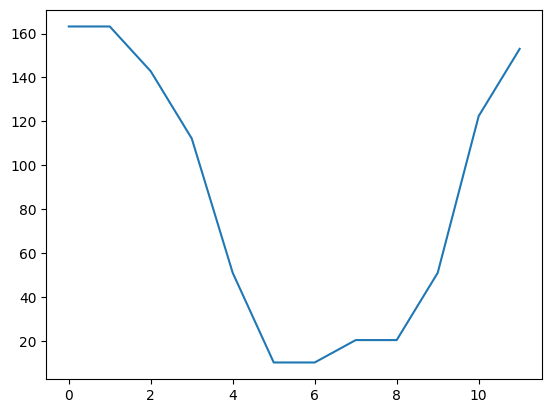

In [64]:
plt.plot(valeur_puissance_totale)
plt.show()

In [ ]:
#degré jour unifié = dju